Average Precision for Schema 2: 0.8286429571596422
Average Precision for Schema 1: 0.7688326519061572


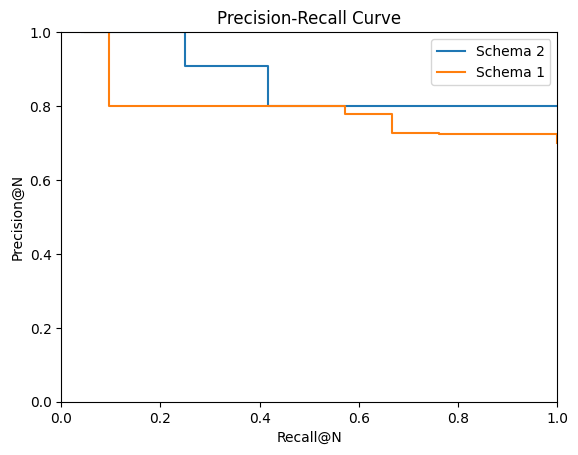

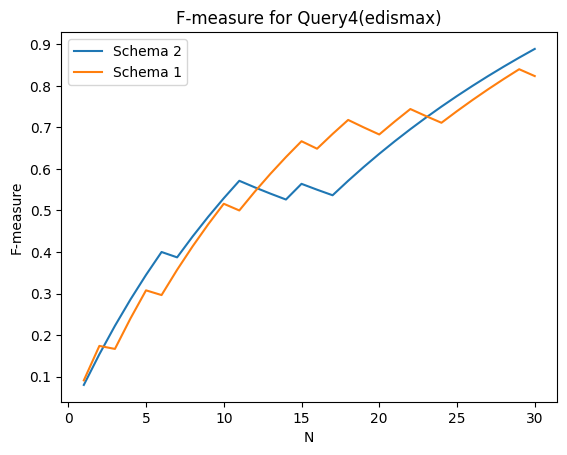

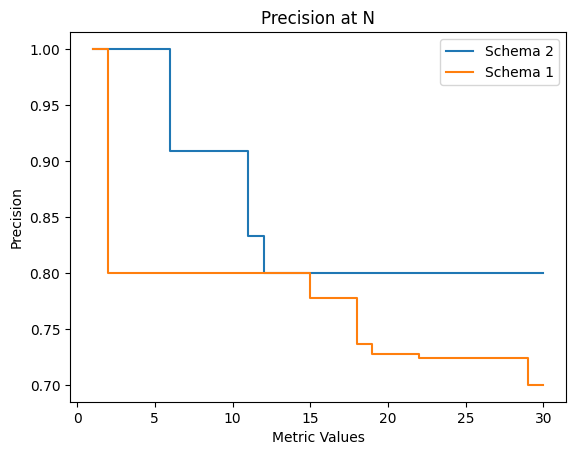

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

def read_csv(file_path):
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
    return data[:, 0], data[:, 1], data[:, 2], data[:, 3]

def plot_precision_at_n(N_values, precision_values, label):
    decreasing_max_precision = np.maximum.accumulate(precision_values[::-1])[::-1]
    #plt.plot(N_values, precision_values, label=label)
    plt.step(N_values, decreasing_max_precision, label=label)

def plot_precision_recall_curve(recall, precision, label):
    decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
    #plt.plot(recall, precision, linestyle='-', label=label)
    plt.step(recall, decreasing_max_precision, label=label)

def plot_f_measure(N_values, f_measure_values, label):
    plt.plot(N_values, f_measure_values, label=label)


def calculate_average_precision(recalls, precision_values):
    sorted_indices = np.argsort(recalls)
    sorted_recalls = recalls[sorted_indices]
    sorted_precision = precision_values[sorted_indices]
    recall_diff = np.diff(sorted_recalls, prepend=0)
    average_precision = np.sum(sorted_precision * recall_diff)
    return average_precision


def calculate_map(N_values, precision_values):
    return np.trapz(precision_values, N_values) / np.max(N_values)

def process_and_plot_csv_files(file_paths, labels,  zoomx=[0.0, 1.0], zoomy=[0.0, 1.0]):
    for file_path, label in zip(file_paths, labels):
        N_values, precision_values, recall_values, f_measure_values = read_csv(file_path)

        # Calculate Average Precision
        average_precision = calculate_average_precision(recall_values, precision_values)
        print(f'Average Precision for {label}: {average_precision}')
        
        # Plot Precision-Recall Curve
        plot_precision_recall_curve(recall_values, precision_values, label=label)

    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall@N')
    plt.ylabel('Precision@N')
    plt.xlim(zoomx)  # Set x-axis limits from 0 to 1.0
    plt.ylim(zoomy)  # Set y-axis limits from 0 to 1.0
    plt.legend()
    plt.show()

    for file_path, label in zip(file_paths, labels):
        N_values, precision_values, recall_values, f_measure_values = read_csv(file_path)

        # Plot F-measure
        plot_f_measure(N_values, f_measure_values, label=label)
    
    plt.title('F-measure for Query4(edismax)')
    plt.xlabel('N')
    plt.ylabel('F-measure')
    plt.legend()
    plt.show()

    for file_path, label in zip(file_paths, labels):
        N_values, precision_values, recall_values, f_measure_values = read_csv(file_path)

        # Plot Precision at N
        plot_precision_at_n(N_values, precision_values, label=label)

    plt.title('Precision at N')
    plt.xlabel('Metric Values')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

# Example usage:
csv_files = ['queries/ask4V2/metrics/metrics_e.csv', 'queries/ask4V1/metrics/metrics_e.csv']  # Replace with your file paths
labels = ['Schema 2', 'Schema 1']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels)


Average Precision for Ask 2 SCHEMA 2 - edismax alt: 0.9891280257777033


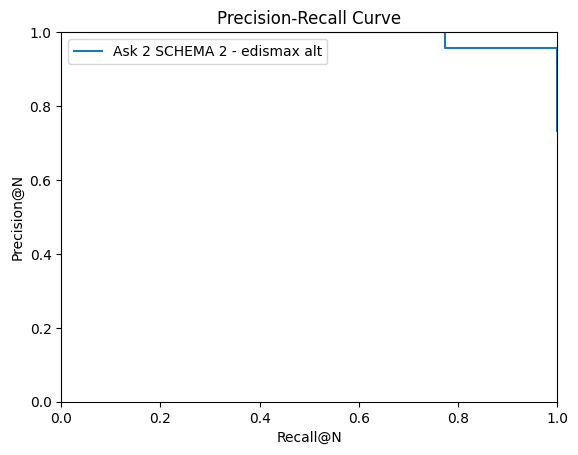

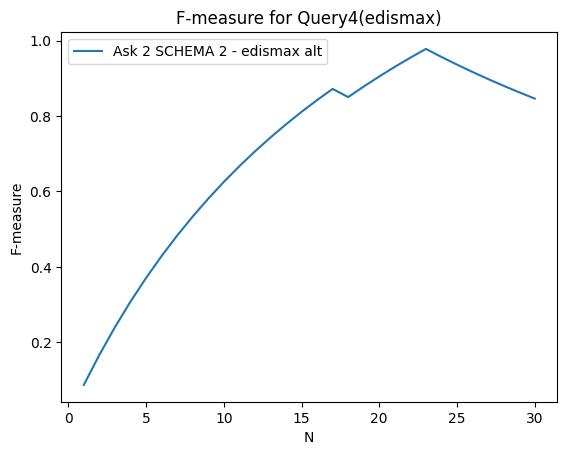

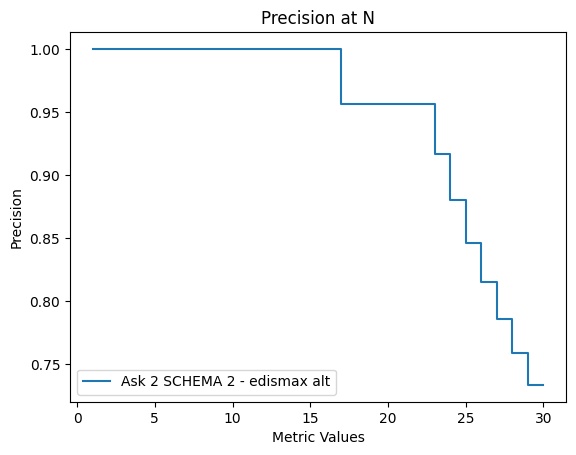

In [67]:
csv_files = ['queries/ask2/v2_EDISMAX_ALT/metrics/metrics.csv']  # Replace with your file paths
labels = ['Ask 2 SCHEMA 2 - edismax alt']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels)

Average Precision for Ask 3 Schema 1 - lucene: 0.6286837379859916
Average Precision for Ask 3 Schema 1 - edismax: 0.6357362922135056
Average Precision for Ask 3 Schema 2 - lucene: 0.6003206524484622
Average Precision for Ask 3 Schema 2 - edismax: 0.7417386449062231


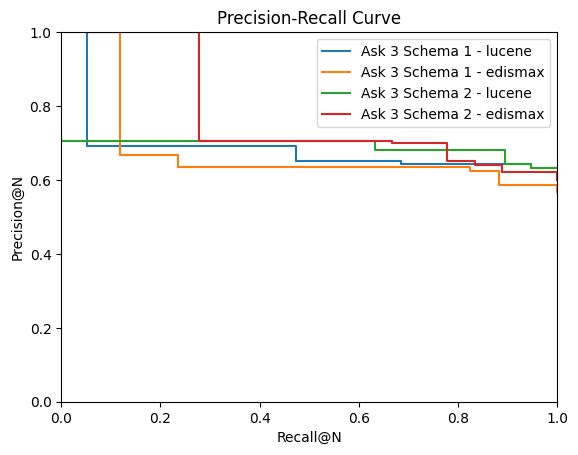

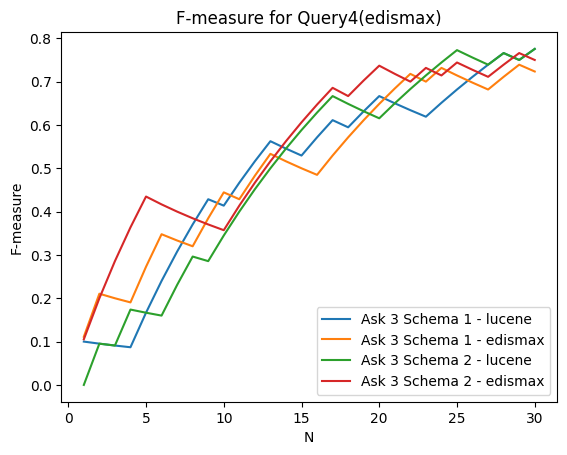

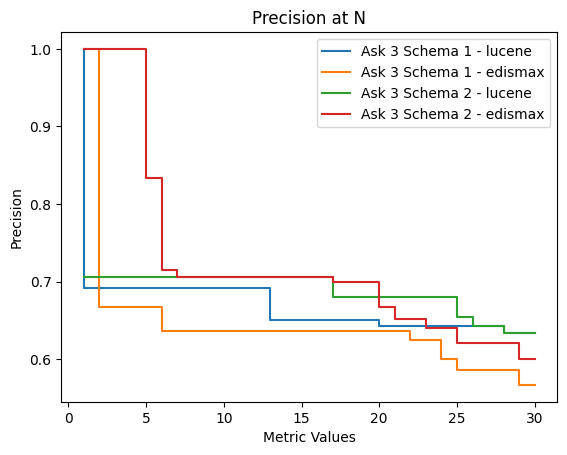

In [68]:
csv_files = ['queries/ask3/ask3V1_lucene/metrics/metrics.csv',
             'queries/ask3/ask3V1_edismax/metrics/metrics.csv', 
             'queries/ask3/ask3V2_lucene/metrics/metrics.csv', 
             'queries/ask3/ask3V2_edismax/metrics/metrics.csv']

csv_files_v1 = ['queries/ask3/ask3V1_lucene/metrics/metrics.csv',
                'queries/ask3/ask3V1_edismax/metrics/metrics.csv']

csv_files_v2 = ['queries/ask3/ask3V2_lucene/metrics/metrics.csv', 
             'queries/ask3/ask3V2_edismax/metrics/metrics.csv'] 

csv_files_edismax = ['queries/ask3/ask3V1_edismax/metrics/metrics.csv',
                        'queries/ask3/ask3V2_edismax/metrics/metrics.csv']

csv_files_lucene = ['queries/ask3/ask3V1_lucene/metrics/metrics.csv',
                        'queries/ask3/ask3V2_lucene/metrics/metrics.csv'] 

labels = ['Ask 3 Schema 1 - lucene', 'Ask 3 Schema 1 - edismax', 'Ask 3 Schema 2 - lucene', 'Ask 3 Schema 2 - edismax'] 
labels_v1 = ['Ask 3 Schema 1 - lucene', 'Ask 3 Schema 1 - edismax'] 
labels_v2 = ['Ask 3 Schema 2 - lucene', 'Ask 3 Schema 2 - edismax']
labels_edismax = ['Ask 3 Schema 1 - edismax', 'Ask 3 Schema 2 - edismax']
labels_lucene = ['Ask 3 Schema 1 - lucene', 'Ask 3 Schema 2 - lucene']
process_and_plot_csv_files(csv_files, labels)

Average Precision for Ask 1 - version 2: 0.977691031828963
Average Precision for Ask 1 - version 1: 0.9815029415029415


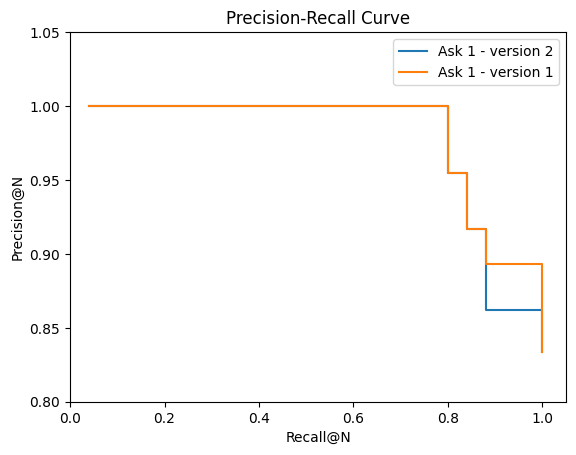

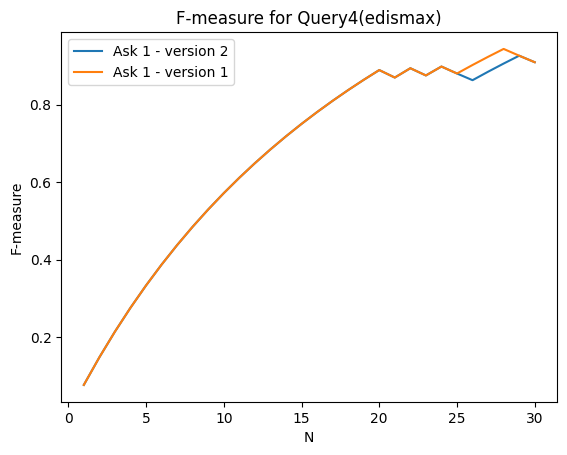

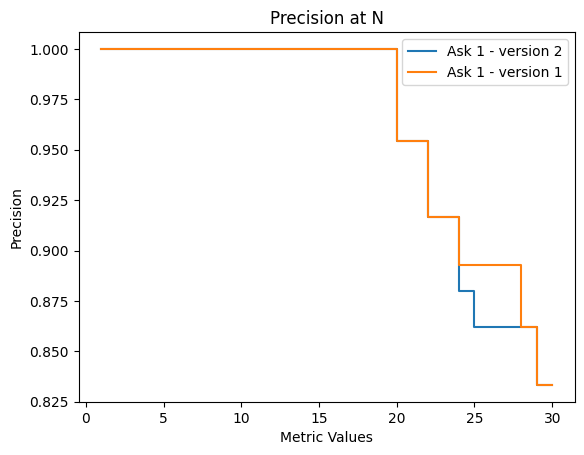

In [69]:
csv_files = ['queries/ask1_EDISMAX/V2/metrics/metrics.csv', 'queries/ask1_EDISMAX/V1/metrics/metrics.csv']  # Replace with your file paths
labels = ['Ask 1 - version 2', 'Ask 1 - version 1']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels, zoomx=[0.0, 1.05], zoomy=[0.8, 1.05])

Average Precision for Ask 2 Schema 2 - lucene: 0.9379280317899418
Average Precision for Ask 2 Schema 2 - edismax: 0.9379280317899418
Average Precision for Ask 2 Schema 1 - lucene: 0.9376382782604602
Average Precision for Ask 2 Schema 1 - edismax: 0.9376382782604602


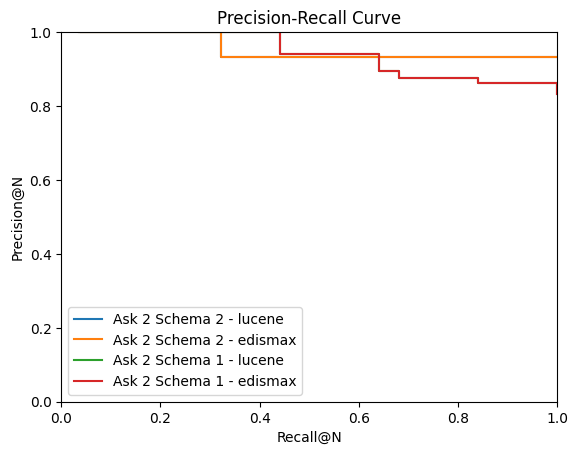

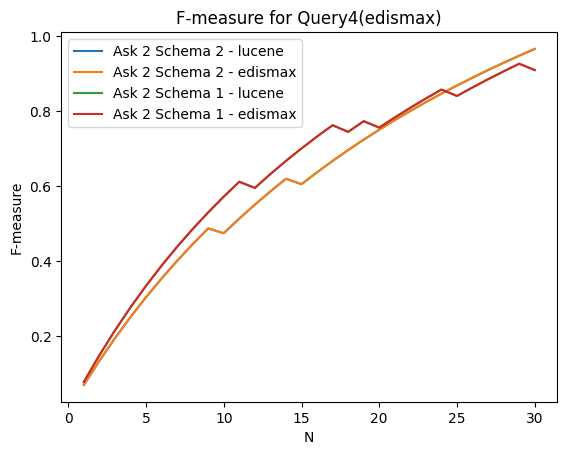

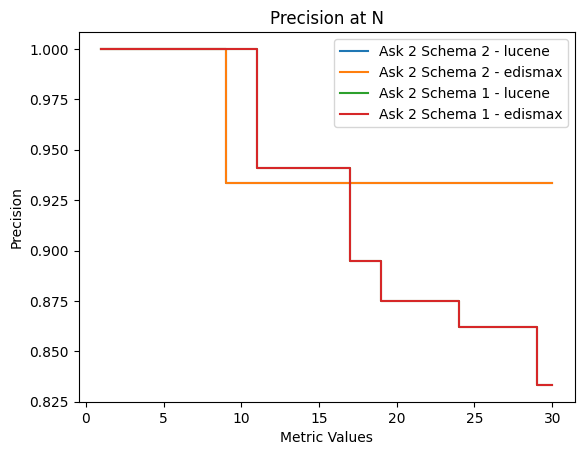

In [70]:
csv_files = ['queries/ask2/v2_LUCENE/metrics/metrics.csv',
             'queries/ask2/v2_EDISMAX/metrics/metrics.csv', 
             'queries/ask2/v1_LUCENE/metrics/metrics.csv', 
             'queries/ask2/v1_EDISMAX/metrics/metrics.csv']  # Replace with your file paths
labels = ['Ask 2 Schema 2 - lucene', 'Ask 2 Schema 2 - edismax', 'Ask 2 Schema 1 - lucene', 'Ask 2 Schema 1 - edismax']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels)

Average Precision for Ask 5 - version 2: 0.9444667505159958
Average Precision for Ask 5 - version 1: 0.7748883928571428


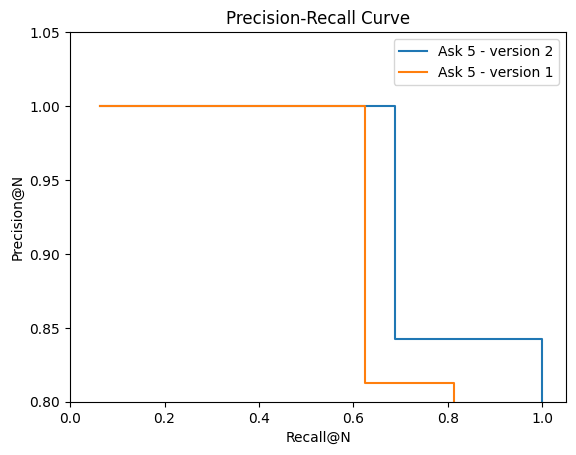

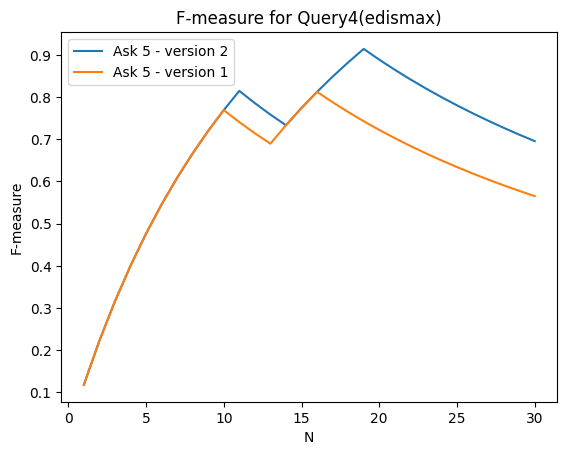

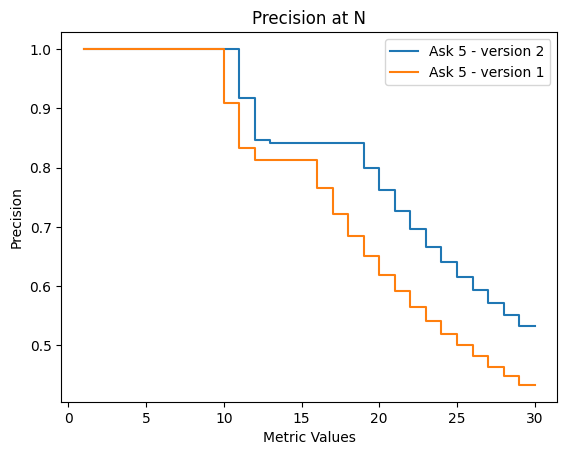

: 

In [71]:
csv_files = ['queries/ask5_EDISMAX/V2/metrics/metrics.csv', 'queries/ask5_EDISMAX/V1/metrics/metrics.csv']  # Replace with your file paths
labels = ['Ask 5 - version 2', 'Ask 5 - version 1']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels, zoomx=[0.0, 1.05], zoomy=[0.8, 1.05])